In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5033,  1.0000],
        [ 0.5625,  1.0000],
        [-0.1934,  1.0000],
        [-0.0951,  1.0000],
        [ 0.7704,  1.0000]])

In [4]:
a = tensor(3.,2); a # vector [3,2] representing the multiples of x1, x2, ie. y = 3 * x1 + 2

tensor([3., 2.])

In [7]:
y = x@a + torch.rand(n) # x1 is a normal function, x2 is a constant (1) thus y=x*a generates y across a range of x(with the only variable be x1)

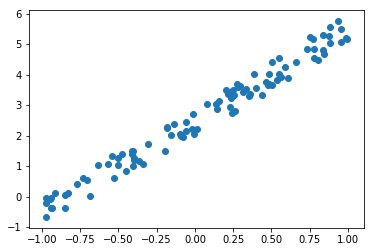

In [8]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [10]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() # mean square error

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [11]:
a = tensor(-1.,1) # set y = -x1 + 1

In [12]:
y_hat = x@a
mse(y_hat, y)

tensor(8.1667)

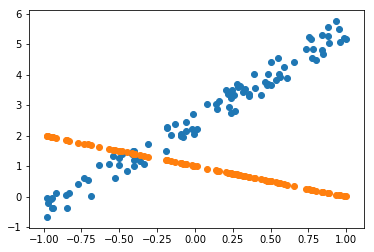

In [13]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [14]:
a = nn.Parameter(a); a ## nn: Neural Net module

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [20]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss) # print mse every 10 iters (t is a global variable defined below)
    loss.backward() # pytorch automatically calc the gradient of a(or, all variables) through the loss function (I think)
    
    # use the torch.no_grad() context manager
    # to prevent PyTorch from building a computational graph for the updates
    with torch.no_grad():
        a.sub_(lr * a.grad) # lr is a global var defined below, a.grad is obviously the gradient of a
        a.grad.zero_() # set grad back to 0; this is necessary as #backward() accumulates the gradient for all mini-batches, for a new epoch, it needs to be set back to 0

In [16]:
lr = 1e-1
for t in range(100): update()

tensor(8.1667, grad_fn=<MeanBackward1>)
tensor(1.3179, grad_fn=<MeanBackward1>)
tensor(0.3833, grad_fn=<MeanBackward1>)
tensor(0.1544, grad_fn=<MeanBackward1>)
tensor(0.0962, grad_fn=<MeanBackward1>)
tensor(0.0814, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0766, grad_fn=<MeanBackward1>)
tensor(0.0764, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)


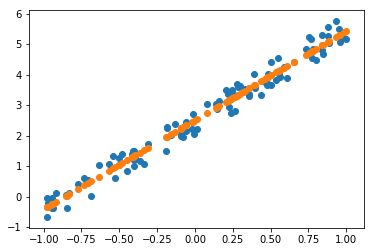

In [17]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [18]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [19]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a) # x@a is the prediction
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.